#Importing Libraries 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
import seaborn as sns

#Importing Dataset

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Preprocessing

In [19]:
Data=pd.read_csv('/content/gdrive/MyDrive/BitcoinProject/bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv')
print("Original No Of Rows in Dataset: ",len(Data))
Data =Data.dropna(axis=0)
print("No Of Rows in Dataset after droping NAN values: ",len(Data))
Data

Original No Of Rows in Dataset:  1556
No Of Rows in Dataset after droping NAN values:  1556


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [20]:
NaN = math.nan
Data['Volume'] = Data['Volume'].replace(['-'],NaN)
Data['Volume'] = Data['Volume'].str.replace(',', '').astype(float)
Data['Market Cap'] = Data['Market Cap'].str.replace(',', '').astype(float)
Data

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,8.605750e+08,4.553580e+10
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,7.059430e+08,4.489070e+10
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,8.037460e+08,4.624670e+10
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,1.380100e+09,4.414440e+10
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,7.891040e+08,4.181650e+10
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,NaN,1.292190e+09
1552,"May 01, 2013",139.00,139.89,107.72,116.99,NaN,1.542820e+09
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,NaN,1.597780e+09
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,NaN,1.491160e+09


In [21]:
print("Original No Of Rows in Dataset: ",len(Data))
Data =Data.dropna(axis=0)
print("No Of Rows in Dataset after droping NAN values: ",len(Data))
Data

Original No Of Rows in Dataset:  1556
No Of Rows in Dataset after droping NAN values:  1313


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,8.605750e+08,4.553580e+10
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,7.059430e+08,4.489070e+10
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,8.037460e+08,4.624670e+10
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,1.380100e+09,4.414440e+10
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,7.891040e+08,4.181650e+10
...,...,...,...,...,...,...,...
1308,"Dec 31, 2013",760.32,760.58,738.17,754.01,2.089730e+07,9.268240e+09
1309,"Dec 30, 2013",741.35,766.60,740.24,756.13,2.070770e+07,9.037000e+09
1310,"Dec 29, 2013",728.05,748.61,714.44,745.05,1.901130e+07,8.872600e+09
1311,"Dec 28, 2013",737.98,747.06,705.35,727.83,3.250580e+07,8.990850e+09


#Visulaization

Plot: Date v/s Open


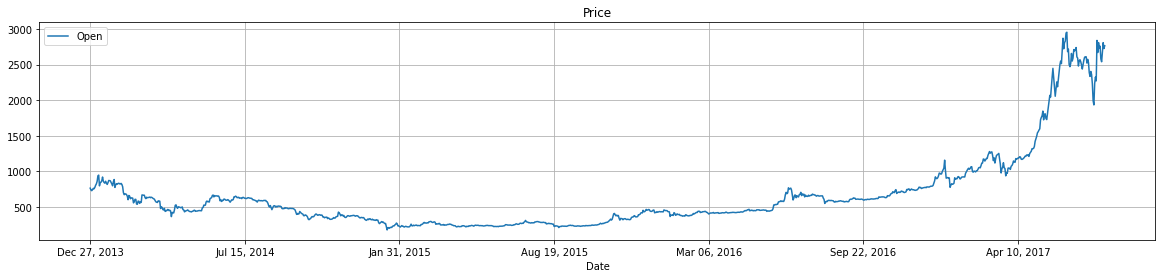

-------------------

Plot: Date v/s High


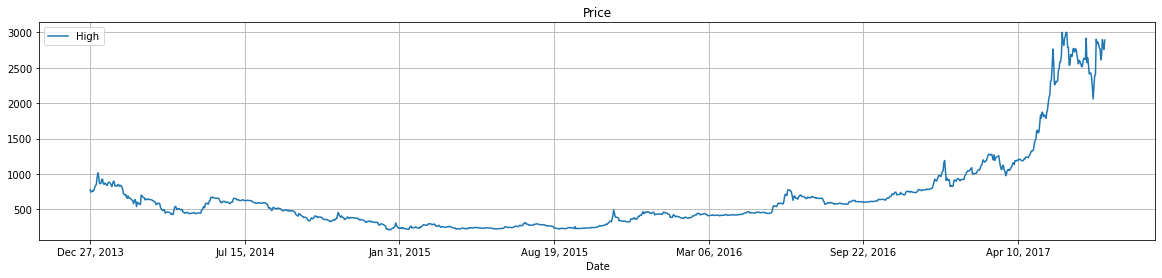

-------------------

Plot: Date v/s Low


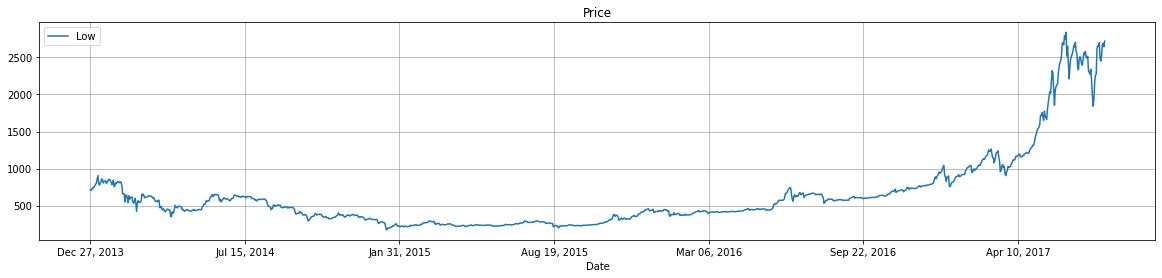

-------------------

Plot: Date v/s Close


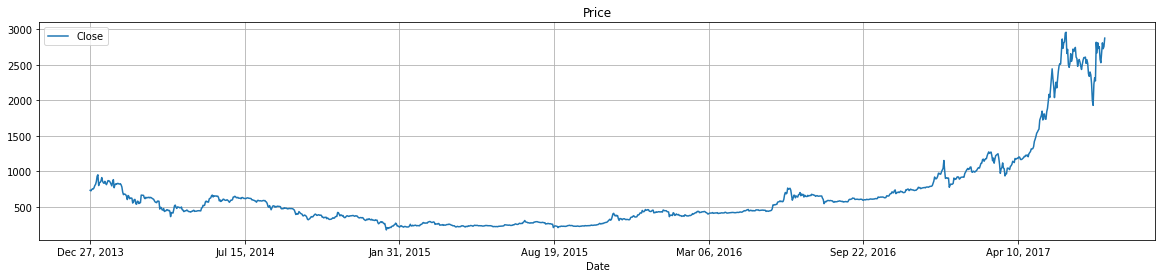

-------------------

Plot: Date v/s Volume


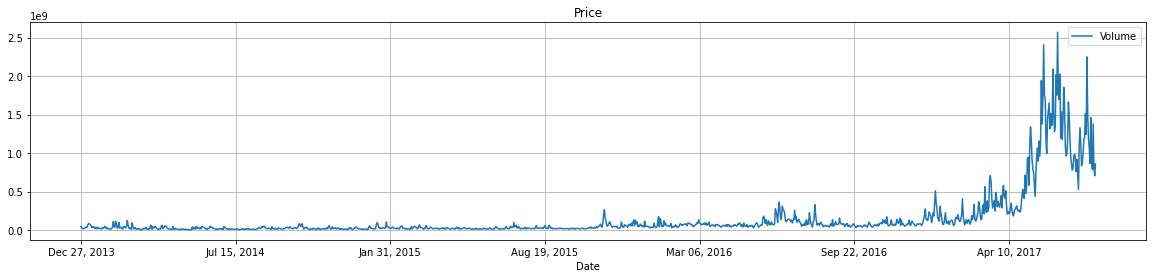

-------------------

Plot: Date v/s Market Cap


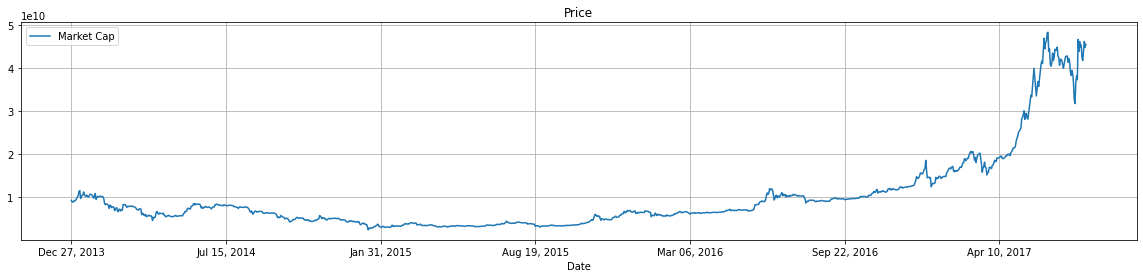

-------------------



In [22]:
for column in Data.columns:
  if(column!='Date'):  
    df = Data[['Date', column]][::-1]
    df = df.set_index('Date')
    df.plot(figsize=(20, 4))
    plt.grid()
    plt.legend(loc='best')
    plt.title('Price')
    print(f"Plot: Date v/s {column}")
    plt.show(block=False)        
    print("-------------------\n")


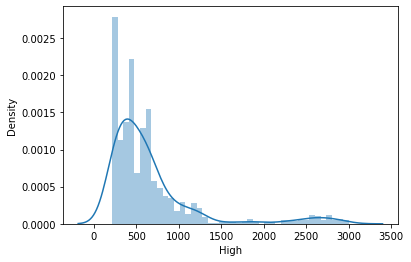

In [23]:
sns.distplot(a=Data.High)
plt.show()

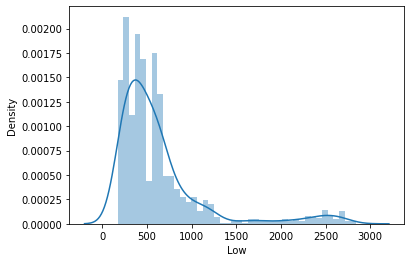

In [24]:
sns.distplot(a=Data.Low)
plt.show()

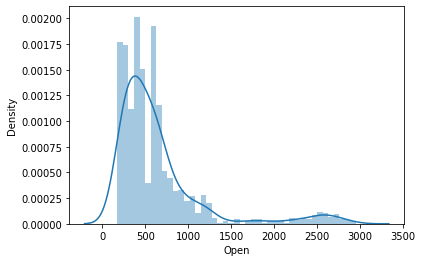

In [25]:
sns.distplot(a=Data.Open)
plt.show()

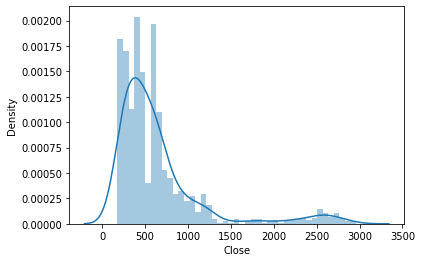

In [26]:
sns.distplot(a=Data['Close'])
plt.show()

#Preparing Dataset

In [44]:
Data

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,8.605750e+08,4.553580e+10
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,7.059430e+08,4.489070e+10
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,8.037460e+08,4.624670e+10
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,1.380100e+09,4.414440e+10
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,7.891040e+08,4.181650e+10
...,...,...,...,...,...,...,...
1308,"Dec 31, 2013",760.32,760.58,738.17,754.01,2.089730e+07,9.268240e+09
1309,"Dec 30, 2013",741.35,766.60,740.24,756.13,2.070770e+07,9.037000e+09
1310,"Dec 29, 2013",728.05,748.61,714.44,745.05,1.901130e+07,8.872600e+09
1311,"Dec 28, 2013",737.98,747.06,705.35,727.83,3.250580e+07,8.990850e+09


In [45]:
scaler = StandardScaler()
for column in Data.columns:
  if column!='Date':
    Data[[column]]=scaler.fit_transform(Data[[column]])
Data

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",3.960335,4.009475,4.043465,4.142712,2.197611,3.986632
1,"Jul 30, 2017",3.887696,3.773666,3.896906,3.923083,1.720609,3.914735
2,"Jul 29, 2017",4.042192,3.864021,3.989666,3.865964,2.022307,4.065862
3,"Jul 28, 2017",3.804194,4.023560,3.964382,4.019422,3.800217,3.831559
4,"Jul 27, 2017",3.540526,3.656364,3.673452,3.764347,1.977140,3.572112
...,...,...,...,...,...,...,...
1308,"Dec 31, 2013",0.215425,0.179686,0.208423,0.199711,-0.392587,-0.055423
1309,"Dec 30, 2013",0.179957,0.190515,0.212428,0.203651,-0.393172,-0.081195
1310,"Dec 29, 2013",0.155089,0.158154,0.162517,0.183057,-0.398405,-0.099517
1311,"Dec 28, 2013",0.173656,0.155366,0.144933,0.151049,-0.356778,-0.086338


In [ ]:
Predictiondays=2
Data['PredictedOpen']=Data[['Open']].shift(Predictiondays)
Data['PredictedHigh']=Data[['High']].shift(Predictiondays)
Data['PredictedLow']=Data[['Low']].shift(Predictiondays)
Data['PredictedClose']=Data[['Close']].shift(Predictiondays)
Data['PredictedVolume']=Data[['Volume']].shift(Predictiondays)
Data['PredictedMarketCap']=Data[['Market Cap']].shift(Predictiondays)
Data

,Date,Open,High,Low,Close,Volume,Market Cap,PredictedOpen,PredictedHigh,PredictedLow,PredictedClose,PredictedVolume,PredictedMarketCap
0,"Jul 31, 2017",3.960335,4.009475,4.043465,4.142712,2.197611,3.986632,NaN,NaN,NaN,NaN,NaN,NaN
1,"Jul 30, 2017",3.887696,3.773666,3.896906,3.923083,1.720609,3.914735,NaN,NaN,NaN,NaN,NaN,NaN
2,"Jul 29, 2017",4.042192,3.864021,3.989666,3.865964,2.022307,4.065862,3.960335,4.009475,4.043465,4.142712,2.197611,3.986632
3,"Jul 28, 2017",3.804194,4.023560,3.964382,4.019422,3.800217,3.831559,3.887696,3.773666,3.896906,3.923083,1.720609,3.914735
4,"Jul 27, 2017",3.540526,3.656364,3.673452,3.764347,1.977140,3.572112,4.042192,3.864021,3.989666,3.865964,2.022307,4.065862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,"Dec 31, 2013",0.215425,0.179686,0.208423,0.199711,-0.392587,-0.055423,0.239956,0.287131,0.264601,0.289637,-0.338319,-0.037597
1309,"Dec 30, 2013",0.179957,0.190515,0.212428,0.203651,-0.393172,-0.081195,0.205422,0.206255,0.240923,0.232034,-0.387676,-0.062691
1310,"Dec 29, 2013",0.155089,0.158154,0.162517,0.183057,-0.398405,-0.099517,0.215425,0.179686,0.208423,0.199711,-0.392587,-0.055423
1311,"Dec 28, 2013",0.173656,0.155366,0.144933,0.151049,-0.356778,-0.086338,0.179957,0.190515,0.212428,0.203651,-0.393172,-0.081195


In [ ]:
Data.head(Predictiondays)

,Date,Open,High,Low,Close,Volume,Market Cap,PredictedOpen,PredictedHigh,PredictedLow,PredictedClose,PredictedVolume,PredictedMarketCap
0,"Jul 31, 2017",3.960335,4.009475,4.043465,4.142712,2.197611,3.986632,NaN,NaN,NaN,NaN,NaN,NaN
1,"Jul 30, 2017",3.887696,3.773666,3.896906,3.923083,1.720609,3.914735,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Data.drop(['Date'],1,inplace=True)
# Data

In [ ]:
ToBePredictedDays=np.array(Data['Open'][0:Predictiondays])
ToBePredictedDays

array([3.96033495, 3.88769614])

In [ ]:
print("Original No Of Rows in Dataset: ",len(Data))
Data =Data.dropna(axis=0)
print("No Of Rows in Dataset after droping NAN values: ",len(Data))
Data

Original No Of Rows in Dataset:  1313
No Of Rows in Dataset after droping NAN values:  1311


,Date,Open,High,Low,Close,Volume,Market Cap,PredictedOpen,PredictedHigh,PredictedLow,PredictedClose,PredictedVolume,PredictedMarketCap
2,"Jul 29, 2017",4.042192,3.864021,3.989666,3.865964,2.022307,4.065862,3.960335,4.009475,4.043465,4.142712,2.197611,3.986632
3,"Jul 28, 2017",3.804194,4.023560,3.964382,4.019422,3.800217,3.831559,3.887696,3.773666,3.896906,3.923083,1.720609,3.914735
4,"Jul 27, 2017",3.540526,3.656364,3.673452,3.764347,1.977140,3.572112,4.042192,3.864021,3.989666,3.865964,2.022307,4.065862
5,"Jul 26, 2017",3.613557,3.507852,3.521516,3.499793,2.434609,3.643274,3.804194,4.023560,3.964382,4.019422,3.800217,3.831559
6,"Jul 25, 2017",3.949603,3.790845,3.579860,3.587209,4.046966,3.972623,3.540526,3.656364,3.673452,3.764347,1.977140,3.572112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,"Dec 31, 2013",0.215425,0.179686,0.208423,0.199711,-0.392587,-0.055423,0.239956,0.287131,0.264601,0.289637,-0.338319,-0.037597
1309,"Dec 30, 2013",0.179957,0.190515,0.212428,0.203651,-0.393172,-0.081195,0.205422,0.206255,0.240923,0.232034,-0.387676,-0.062691
1310,"Dec 29, 2013",0.155089,0.158154,0.162517,0.183057,-0.398405,-0.099517,0.215425,0.179686,0.208423,0.199711,-0.392587,-0.055423
1311,"Dec 28, 2013",0.173656,0.155366,0.144933,0.151049,-0.356778,-0.086338,0.179957,0.190515,0.212428,0.203651,-0.393172,-0.081195


#Open Column

In [ ]:
X=np.array(Data['Open'])
Y=np.array(Data['PredictedOpen'])
print(len(X))
print(Y)

1311
[3.96033495 3.88769614 4.04219151 ... 0.21542544 0.17995676 0.15508941]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state=2021)
print(len(Y_train))
len(X_train)

1048


1048

In [ ]:
Y_train

array([-0.28846544,  1.06018587,  0.51323523, ..., -0.00753926,
        3.55750271, -0.10005325])

##Models

In [ ]:
MseDictionary={'SVR':0}

###SVR

In [ ]:
SVRModel=SVR(kernel='rbf',C=100,gamma=0.001)
SVRModel.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
acc=SVRModel.score(X_test.reshape(-1, 1),Y_test.reshape(-1, 1))
print("Accuracy from Svr ",acc)


Accuracy from Svr  0.989102443389584


In [ ]:
acc=SVRModel.score(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
print("Accuracy from Svr ",acc)

Accuracy from Svr  0.9917440668750742


In [ ]:
Y_pred=SVRModel.predict(Y_test.reshape(-1, 1))
print("Predicted Values of Open")
print(Y_pred[0:5])
print( )
print("Actual Values of Open")
print(Y_test[0:5])

Predicted Values of Open
[-0.6020215  -0.18502779 -0.36311334 -0.06584962 -0.45844181]

Actual Values of Open
[-0.59586692 -0.18495746 -0.36043115 -0.06752004 -0.45436613]


In [ ]:
ms=mse(Y_test.reshape(-1, 1), Y_pred)
MseDictionary['SVR']=ms

In [ ]:
ToBePredictedDays.reshape(-1, 1)

array([[3.96033495],
       [3.88769614]])

In [ ]:
Predictions=SVRModel.predict(ToBePredictedDays.reshape(-1, 1))
print(Predictions)
 

[3.94490575 3.87506377]


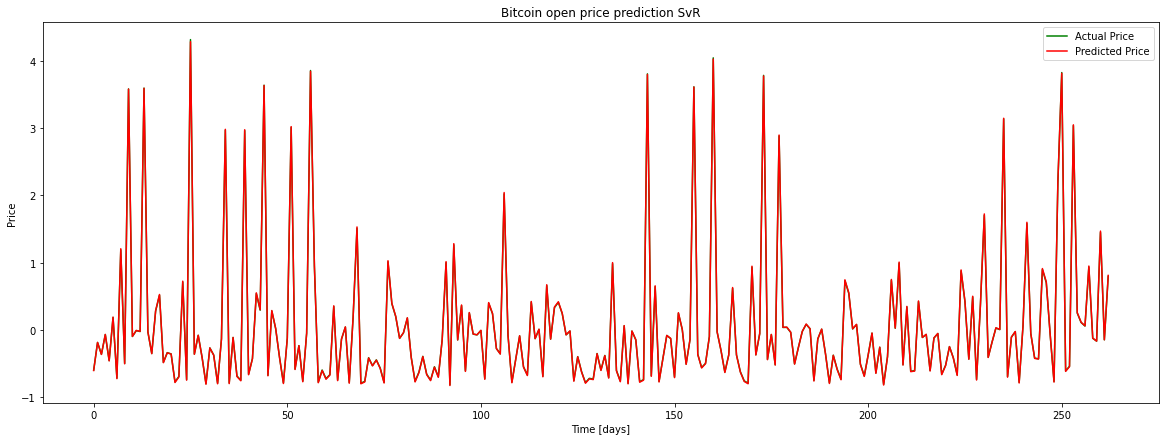

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual Price", color='green')
plt.plot(Y_pred, label="Predicted Price", color='red')


plt.title('Bitcoin open price prediction SvR')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

###Random Forest Regressor

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=regr.predict(Y_test.reshape(-1, 1))
mse(Y_test.reshape(-1, 1), Y_pred)

0.05538748479179345

In [ ]:
MseDictionary['RandomForest']=mse(Y_test.reshape(-1, 1), Y_pred)

In [ ]:
MseDictionary

{'RandomForest': 0.05538748479179345, 'SVR': 5.987385816707458e-05}

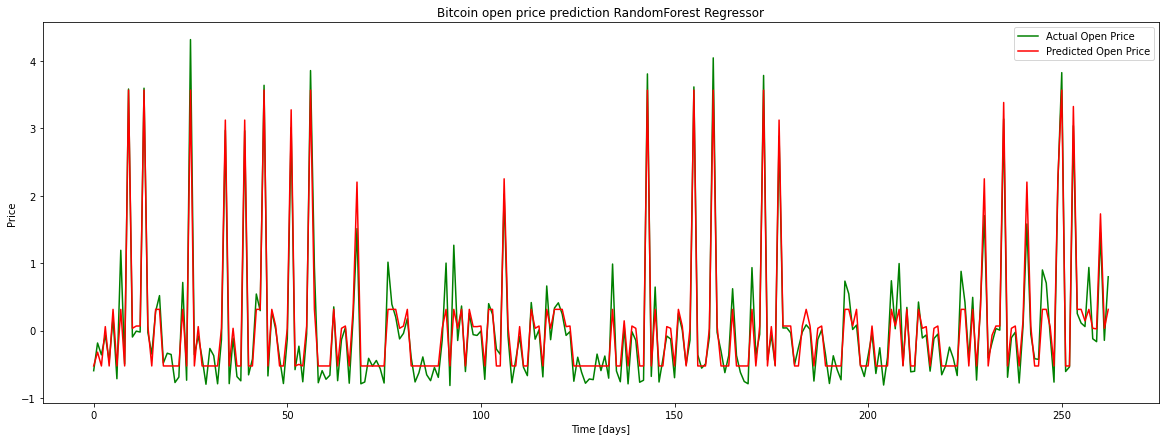

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual Open Price", color='green')
plt.plot(Y_pred, label="Predicted Open Price", color='red')


plt.title('Bitcoin open price prediction RandomForest Regressor')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

###Linear Regression

In [ ]:
reg = LinearRegression().fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=reg.predict(Y_test.reshape(-1, 1))
print(mse(Y_test.reshape(-1, 1), Y_pred))
MseDictionary['Lnear Regression']=mse(Y_test.reshape(-1, 1), Y_pred)

5.156210925447156e-05


In [ ]:
MseDictionary


{'Lnear Regression': 5.156210925447156e-05,
 'RandomForest': 0.05538748479179345,
 'SVR': 5.987385816707458e-05}

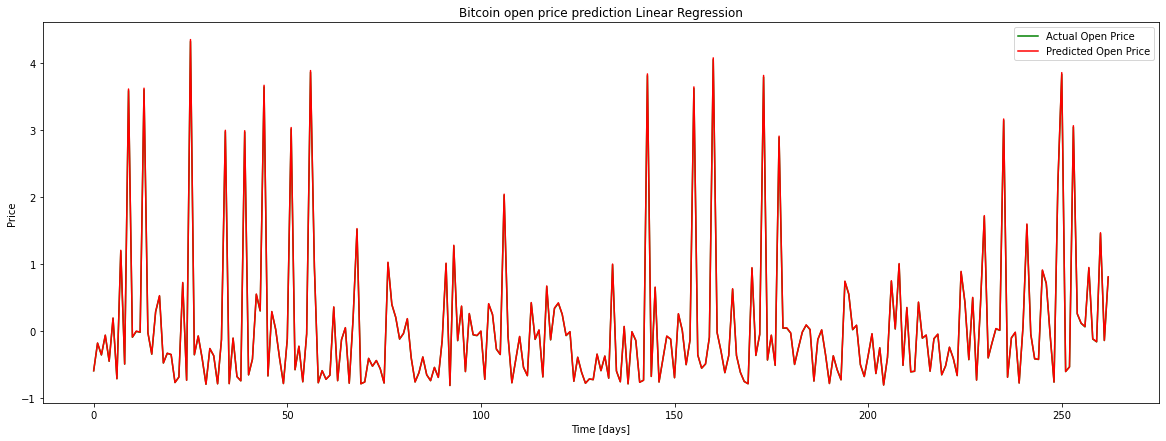

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual Open Price", color='green')
plt.plot(Y_pred, label="Predicted Open Price", color='red')


plt.title('Bitcoin open price prediction Linear Regression')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

###Xgboost

In [ ]:
model=XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=model.predict(Y_test.reshape(-1, 1))
print(mse(Y_test.reshape(-1, 1), Y_pred))
MseDictionary['XGboost']=mse(Y_test.reshape(-1, 1), Y_pred)

[14:03:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.01163919651105041


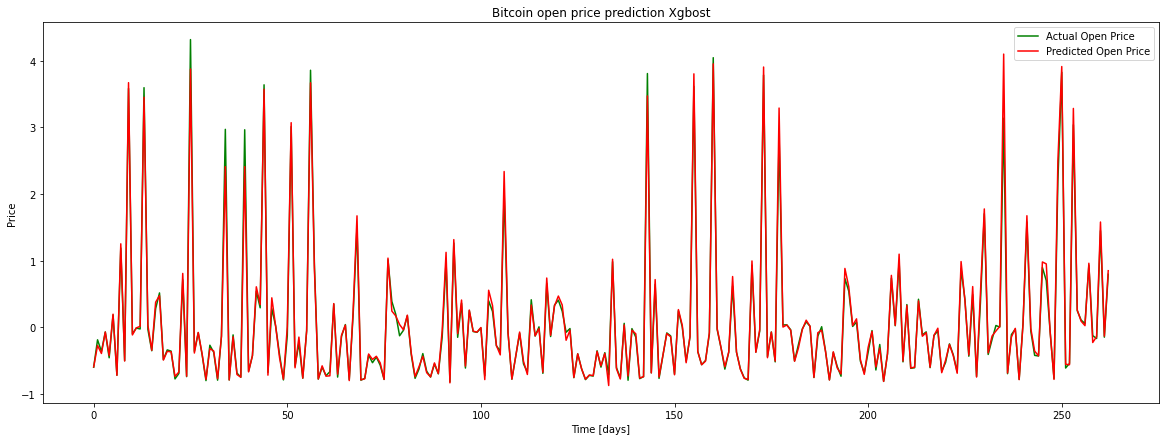

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual Open Price", color='green')
plt.plot(Y_pred, label="Predicted Open Price", color='red')


plt.title('Bitcoin open price prediction Xgbost')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

##Comparison 

In [ ]:
MseDictionary

{'Lnear Regression': 5.156210925447156e-05,
 'RandomForest': 0.05538748479179345,
 'SVR': 5.987385816707458e-05,
 'XGboost': 0.01163919651105041}

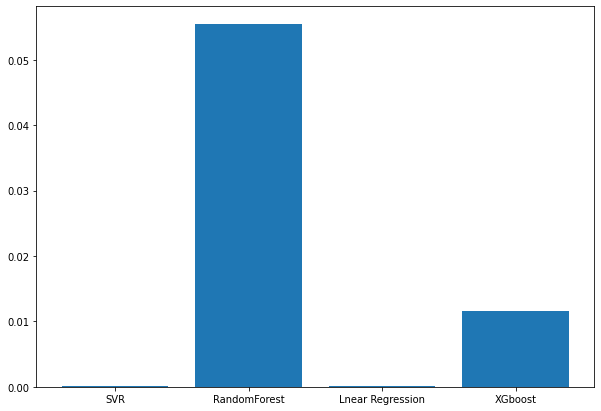

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(MseDictionary)), list(MseDictionary.values()), align='center')
plt.xticks(range(len(MseDictionary)), list(MseDictionary.keys()))
plt.show()

In [ ]:
temp = min(MseDictionary.values())
res = [key for key in MseDictionary if MseDictionary[key] == temp]
  
print("Best Model is: " + str(res))

Best Model is: ['Lnear Regression']


#High Column

In [ ]:
X=np.array(Data['High'])
Y=np.array(Data['PredictedHigh'])
print(len(X))
print(Y)

1311
[4.00947518 3.77366608 3.8640215  ... 0.17968644 0.19051541 0.1581544 ]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state=2021)
print(len(Y_train))
len(X_train)

1048


1048

In [ ]:
Y_train

array([-0.28822617,  0.99802982,  0.48178256, ...,  0.00510963,
        3.46311544, -0.08958097])

##Models

In [ ]:
MseDictionary={'SVR':0}

###SVR

In [ ]:
SVRModel=SVR(kernel='rbf',C=100,gamma=0.001)
SVRModel.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
acc=SVRModel.score(X_test.reshape(-1, 1),Y_test.reshape(-1, 1))
print("Accuracy from Svr ",acc)


Accuracy from Svr  0.9907906448349237


In [ ]:
acc=SVRModel.score(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
print("Accuracy from Svr ",acc)

Accuracy from Svr  0.99099985106123


In [ ]:
Y_pred=SVRModel.predict(Y_test.reshape(-1, 1))
print("Predicted Values of Open")
print(Y_pred[0:5])
print( )
print("Actual Values of Open")
print(Y_test[0:5])

Predicted Values of Open
[-0.58815567 -0.19214706 -0.33128102 -0.07876731 -0.38092062]

Actual Values of Open
[-0.60120523 -0.20587556 -0.34463759 -0.09289082 -0.39417747]


In [ ]:
ms=mse(Y_test.reshape(-1, 1), Y_pred)
MseDictionary['SVR']=ms

In [ ]:
ToBePredictedDays.reshape(-1, 1)

array([[3.96033495],
       [3.88769614]])

In [ ]:
Predictions=SVRModel.predict(ToBePredictedDays.reshape(-1, 1))
print(Predictions)
 

[3.96966399 3.89862804]


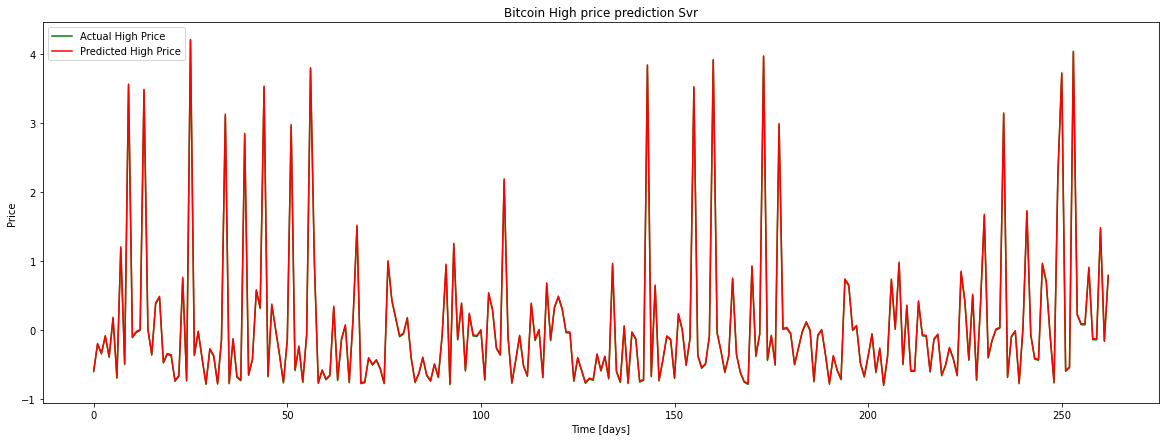

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual High Price", color='green')
plt.plot(Y_pred, label="Predicted High Price", color='red')


plt.title('Bitcoin High price prediction Svr')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

###Random Forest Regressor

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=regr.predict(Y_test.reshape(-1, 1))
mse(Y_test.reshape(-1, 1), Y_pred)

0.05331405963370874

In [ ]:
MseDictionary['RandomForest']=mse(Y_test.reshape(-1, 1), Y_pred)

In [ ]:
MseDictionary

{'RandomForest': 0.05331405963370874, 'SVR': 0.00022340900398585154}

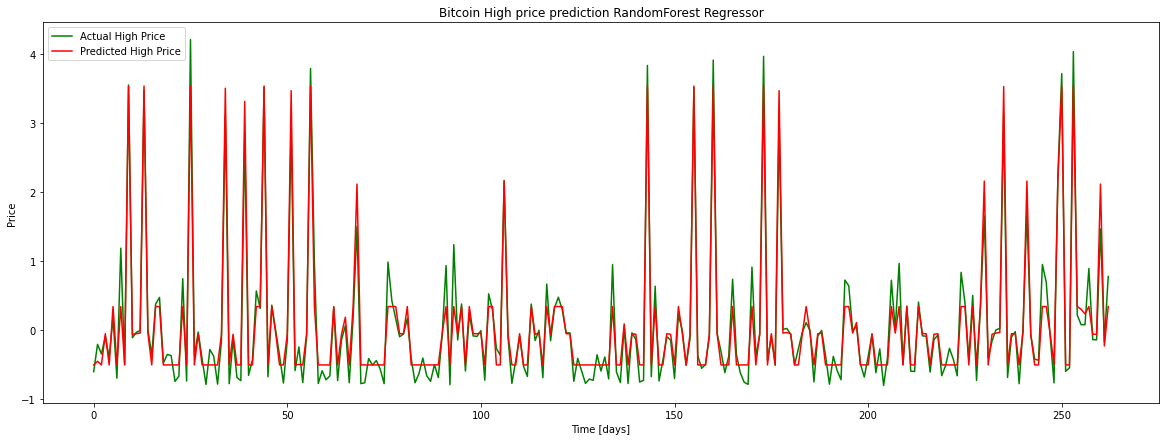

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual High Price", color='green')
plt.plot(Y_pred, label="Predicted High Price", color='red')


plt.title('Bitcoin High price prediction RandomForest Regressor')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

###Linear Regression

In [ ]:
reg = LinearRegression().fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=reg.predict(Y_test.reshape(-1, 1))
print(mse(Y_test.reshape(-1, 1), Y_pred))
MseDictionary['Lnear Regression']=mse(Y_test.reshape(-1, 1), Y_pred)

6.6375760030144e-05


In [ ]:
MseDictionary


{'Lnear Regression': 6.6375760030144e-05,
 'RandomForest': 0.05331405963370874,
 'SVR': 0.00022340900398585154}

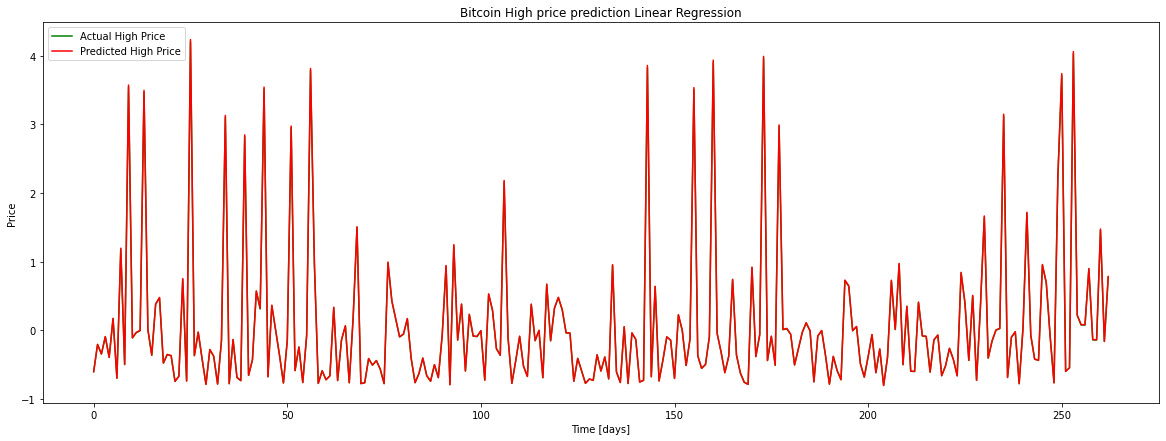

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual High Price", color='green')
plt.plot(Y_pred, label="Predicted High Price", color='red')


plt.title('Bitcoin High price prediction Linear Regression')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

###Xgboost

In [ ]:
model=XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=model.predict(Y_test.reshape(-1, 1))
print(mse(Y_test.reshape(-1, 1), Y_pred))
MseDictionary['XGboost']=mse(Y_test.reshape(-1, 1), Y_pred)

[14:03:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.010953119315975578


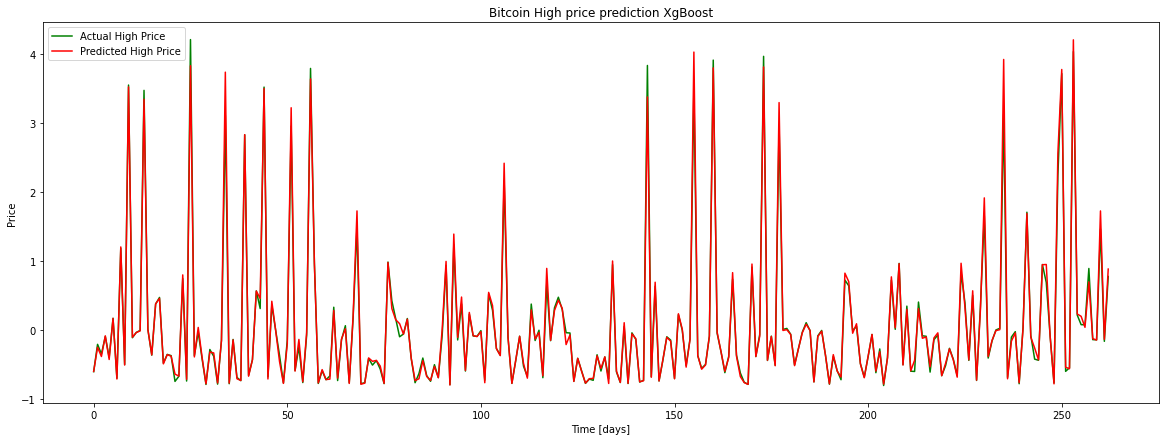

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual High Price", color='green')
plt.plot(Y_pred, label="Predicted High Price", color='red')


plt.title('Bitcoin High price prediction XgBoost')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

##Comparison 

In [ ]:
MseDictionary

{'Lnear Regression': 6.6375760030144e-05,
 'RandomForest': 0.05331405963370874,
 'SVR': 0.00022340900398585154,
 'XGboost': 0.010953119315975578}

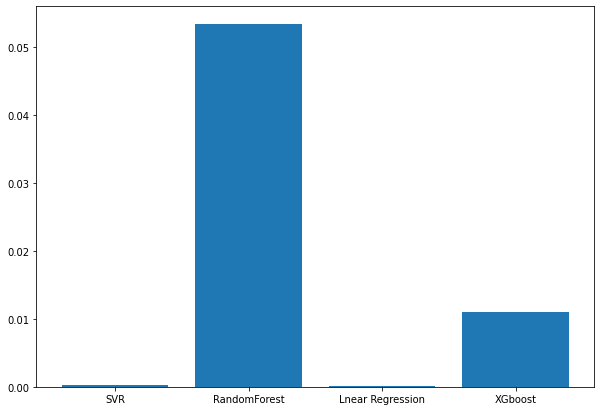

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(MseDictionary)), list(MseDictionary.values()), align='center')
plt.xticks(range(len(MseDictionary)), list(MseDictionary.keys()))
plt.show()

In [ ]:
temp = min(MseDictionary.values())
res = [key for key in MseDictionary if MseDictionary[key] == temp]
  
print("Best Model is: " + str(res))

Best Model is: ['Lnear Regression']


#Low Column

In [ ]:
X=np.array(Data['Low'])
Y=np.array(Data['PredictedLow'])
print(len(X))
print(Y)

1311
[4.0434646  3.89690645 3.98966599 ... 0.20842311 0.21242754 0.16251729]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state=2021)
print(len(Y_train))
len(X_train)

1048


1048

In [ ]:
Y_train

array([-0.28530143,  1.11166317,  0.42702226, ...,  0.01868679,
        3.52488165, -0.07743879])

##Models

In [ ]:
MseDictionary={'SVR':0}

###SVR

In [ ]:
SVRModel=SVR(kernel='rbf',C=100,gamma=0.001)
SVRModel.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
acc=SVRModel.score(X_test.reshape(-1, 1),Y_test.reshape(-1, 1))
print("Accuracy from Svr ",acc)


Accuracy from Svr  0.9860767853624136


In [ ]:
acc=SVRModel.score(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
print("Accuracy from Svr ",acc)

Accuracy from Svr  0.9907723550814908


In [ ]:
Y_pred=SVRModel.predict(Y_test.reshape(-1, 1))
print("Predicted Values of Open")
print(Y_pred[0:5])
print( )
print("Actual Values of Open")
print(Y_test[0:5])

Predicted Values of Open
[-0.63619769 -0.2703868  -0.44309428 -0.06696502 -0.47161233]

Actual Values of Open
[-0.61557959 -0.25477493 -0.42499209 -0.05453425 -0.4531198 ]


In [ ]:
ms=mse(Y_test.reshape(-1, 1), Y_pred)
MseDictionary['SVR']=ms

In [ ]:
ToBePredictedDays.reshape(-1, 1)

array([[3.96033495],
       [3.88769614]])

In [ ]:
Predictions=SVRModel.predict(ToBePredictedDays.reshape(-1, 1))
print(Predictions)
 

[3.99321767 3.92127661]


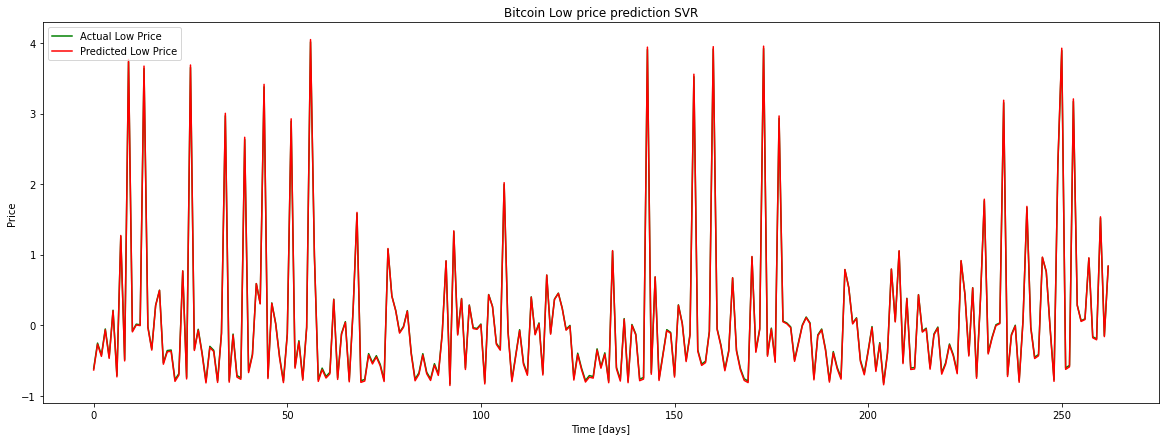

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual Low Price", color='green')
plt.plot(Y_pred, label="Predicted Low Price", color='red')


plt.title('Bitcoin Low price prediction SVR')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

###Random Forest Regressor

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=regr.predict(Y_test.reshape(-1, 1))
mse(Y_test.reshape(-1, 1), Y_pred)

0.06325465161900813

In [ ]:
MseDictionary['RandomForest']=mse(Y_test.reshape(-1, 1), Y_pred)

In [ ]:
MseDictionary

{'RandomForest': 0.06325465161900813, 'SVR': 0.000324279132033958}

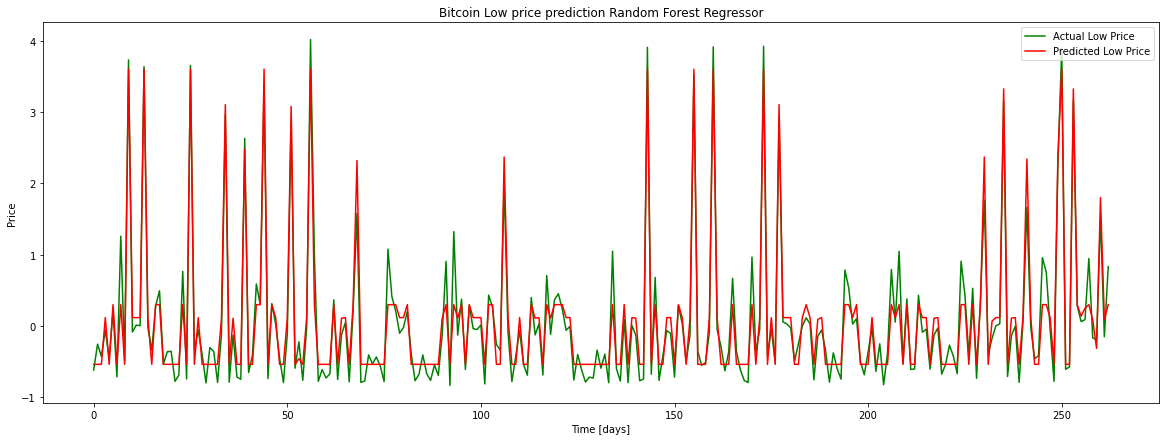

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual Low Price", color='green')
plt.plot(Y_pred, label="Predicted Low Price", color='red')


plt.title('Bitcoin Low price prediction Random Forest Regressor')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

###Linear Regression

In [ ]:
reg = LinearRegression().fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=reg.predict(Y_test.reshape(-1, 1))
print(mse(Y_test.reshape(-1, 1), Y_pred))
MseDictionary['Lnear Regression']=mse(Y_test.reshape(-1, 1), Y_pred)

7.662696861397509e-05


In [ ]:
MseDictionary


{'Lnear Regression': 7.662696861397509e-05,
 'RandomForest': 0.06325465161900813,
 'SVR': 0.000324279132033958}

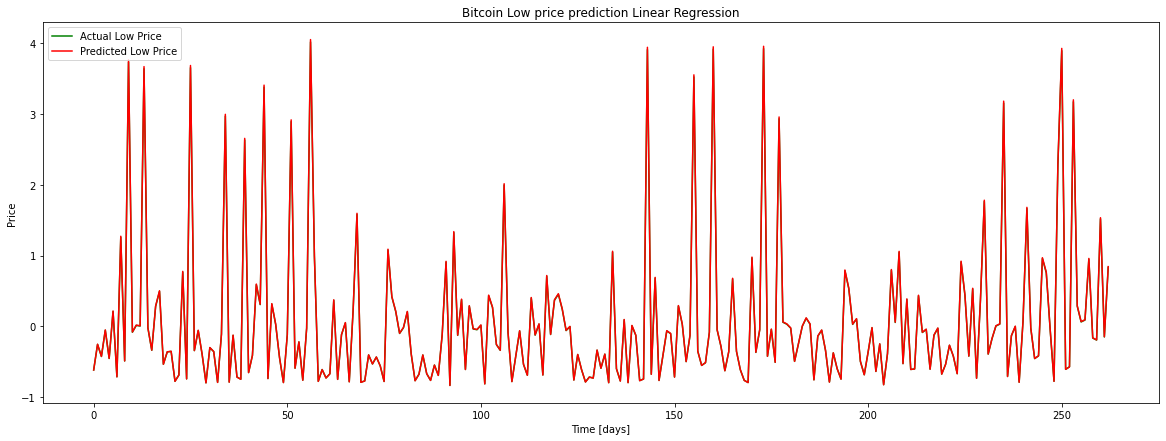

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual Low Price", color='green')
plt.plot(Y_pred, label="Predicted Low Price", color='red')


plt.title('Bitcoin Low price prediction Linear Regression')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

###Xgboost

In [ ]:
model=XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=model.predict(Y_test.reshape(-1, 1))
print(mse(Y_test.reshape(-1, 1), Y_pred))
MseDictionary['XGboost']=mse(Y_test.reshape(-1, 1), Y_pred)

[14:03:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.012172869477919016


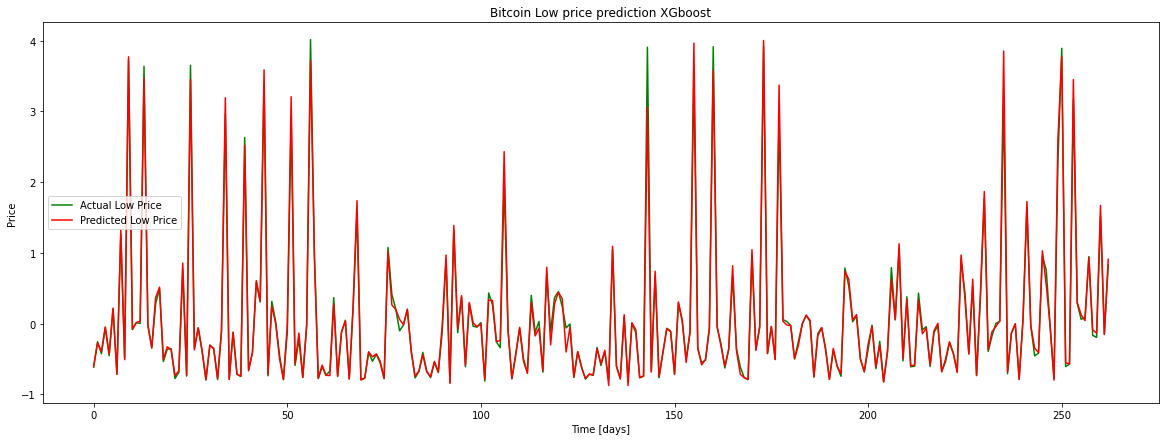

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual Low Price", color='green')
plt.plot(Y_pred, label="Predicted Low Price", color='red')


plt.title('Bitcoin Low price prediction XGboost')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

##Comparison 

In [ ]:
MseDictionary

{'Lnear Regression': 7.662696861397509e-05,
 'RandomForest': 0.06325465161900813,
 'SVR': 0.000324279132033958,
 'XGboost': 0.012172869477919016}

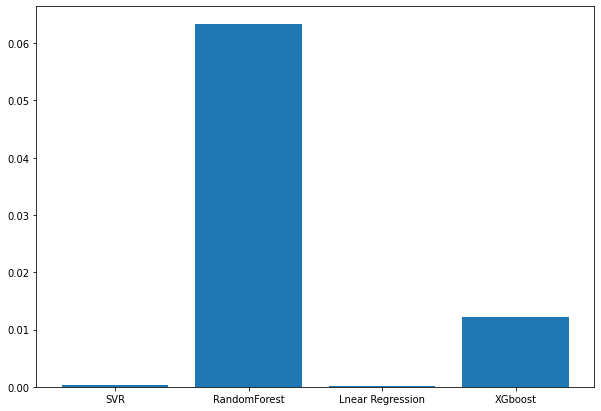

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(MseDictionary)), list(MseDictionary.values()), align='center')
plt.xticks(range(len(MseDictionary)), list(MseDictionary.keys()))
plt.show()

In [ ]:
temp = min(MseDictionary.values())
res = [key for key in MseDictionary if MseDictionary[key] == temp]
  
print("Best Model is: " + str(res))

Best Model is: ['Lnear Regression']


#Close Column

In [ ]:
X=np.array(Data['Close'])
Y=np.array(Data['PredictedClose'])
print(len(X))
print(Y)

1311
[4.1427122  3.92308346 3.86596437 ... 0.19971082 0.20365135 0.18305651]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state=2021)
print(len(Y_train))
len(X_train)

1048


1048

In [ ]:
Y_train

array([-0.27157276,  1.04781681,  0.40270384, ...,  0.02359519,
        3.46700437, -0.06636784])

##Models

In [ ]:
MseDictionary={'SVR':0}

###SVR

In [ ]:
SVRModel=SVR(kernel='rbf',C=100,gamma=0.001)
SVRModel.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
acc=SVRModel.score(X_test.reshape(-1, 1),Y_test.reshape(-1, 1))
print("Accuracy from Svr ",acc)


Accuracy from Svr  0.9878549052926191


In [ ]:
acc=SVRModel.score(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
print("Accuracy from Svr ",acc)

Accuracy from Svr  0.9921380949868152


In [ ]:
Y_pred=SVRModel.predict(Y_test.reshape(-1, 1))
print("Predicted Values of Open")
print(Y_pred[0:5])
print( )
print("Actual Values of Open")
print(Y_test[0:5])

Predicted Values of Open
[-0.6086042  -0.26247257 -0.39607088 -0.07296916 -0.39458409]

Actual Values of Open
[-0.60324636 -0.2613311  -0.3932459  -0.07430466 -0.39177749]


In [ ]:
ms=mse(Y_test.reshape(-1, 1), Y_pred)
MseDictionary['SVR']=ms

In [ ]:
ToBePredictedDays.reshape(-1, 1)

array([[3.96033495],
       [3.88769614]])

In [ ]:
Predictions=SVRModel.predict(ToBePredictedDays.reshape(-1, 1))
print(Predictions)
 

[3.9654482 3.8947792]


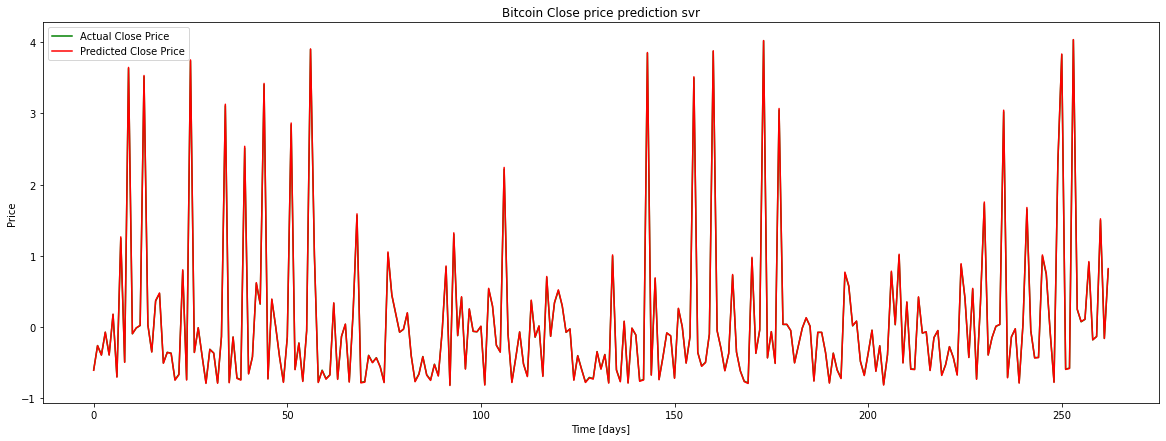

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual Close Price", color='green')
plt.plot(Y_pred, label="Predicted Close Price", color='red')


plt.title('Bitcoin Close price prediction svr')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

###Random Forest Regressor

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=regr.predict(Y_test.reshape(-1, 1))
mse(Y_test.reshape(-1, 1), Y_pred)

0.05656037995838826

In [ ]:
MseDictionary['RandomForest']=mse(Y_test.reshape(-1, 1), Y_pred)

In [ ]:
MseDictionary

{'RandomForest': 0.05656037995838826, 'SVR': 6.320472197045313e-05}

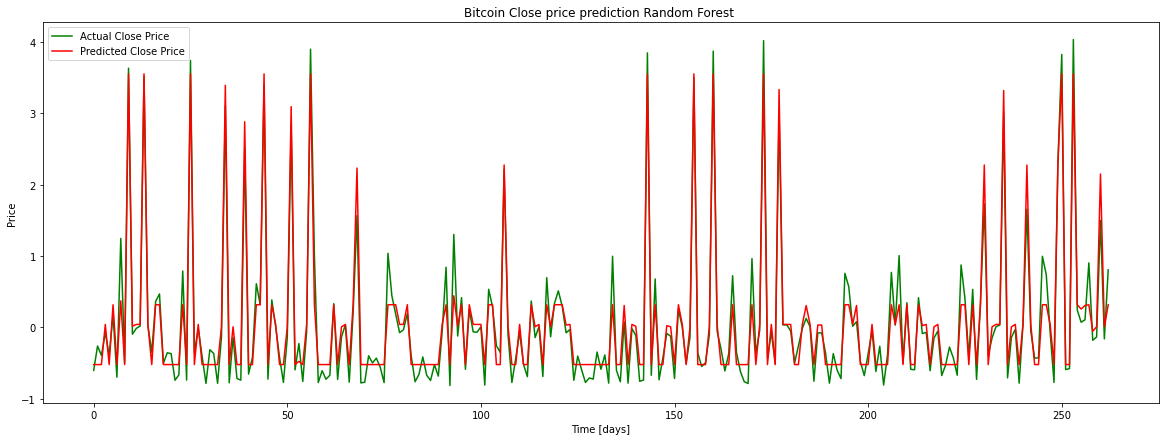

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual Close Price", color='green')
plt.plot(Y_pred, label="Predicted Close Price", color='red')


plt.title('Bitcoin Close price prediction Random Forest ')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

###Linear Regression

In [ ]:
reg = LinearRegression().fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=reg.predict(Y_test.reshape(-1, 1))
print(mse(Y_test.reshape(-1, 1), Y_pred))
MseDictionary['Lnear Regression']=mse(Y_test.reshape(-1, 1), Y_pred)

0.0001562752350657772


In [ ]:
MseDictionary


{'Lnear Regression': 0.0001562752350657772,
 'RandomForest': 0.05656037995838826,
 'SVR': 6.320472197045313e-05}

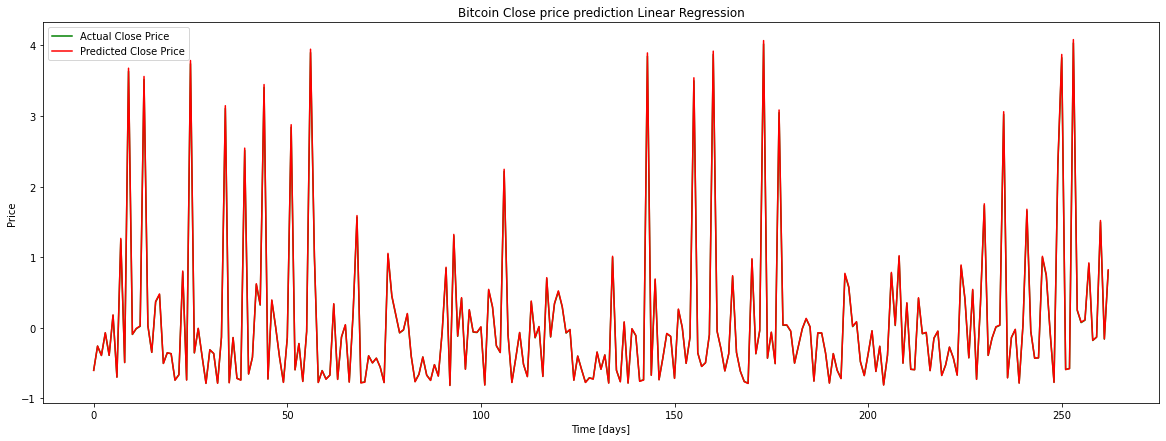

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual Close Price", color='green')
plt.plot(Y_pred, label="Predicted Close Price", color='red')


plt.title('Bitcoin Close price prediction Linear Regression')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

###Xgboost

In [ ]:
model=XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=model.predict(Y_test.reshape(-1, 1))
print(mse(Y_test.reshape(-1, 1), Y_pred))
MseDictionary['XGboost']=mse(Y_test.reshape(-1, 1), Y_pred)

[14:03:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.011793693915588977


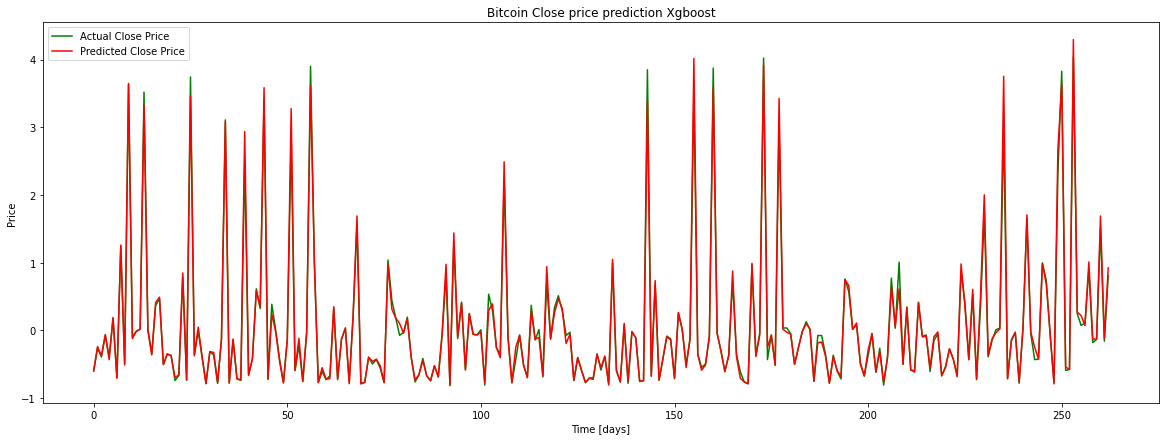

In [ ]:
plt.figure(figsize=(20,7)) 
plt.plot(Y_test, label="Actual Close Price", color='green')
plt.plot(Y_pred, label="Predicted Close Price", color='red')


plt.title('Bitcoin Close price prediction Xgboost')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();

##Comparison 

In [ ]:
MseDictionary

{'Lnear Regression': 0.0001562752350657772,
 'RandomForest': 0.05656037995838826,
 'SVR': 6.320472197045313e-05,
 'XGboost': 0.011793693915588977}

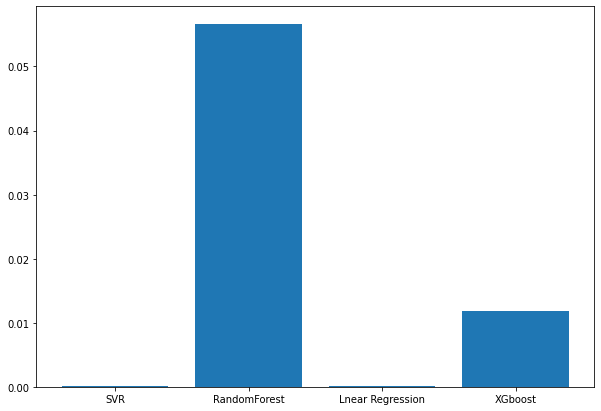

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(MseDictionary)), list(MseDictionary.values()), align='center')
plt.xticks(range(len(MseDictionary)), list(MseDictionary.keys()))
plt.show()

In [ ]:
temp = min(MseDictionary.values())
res = [key for key in MseDictionary if MseDictionary[key] == temp]
  
print("Best Model is: " + str(res))

Best Model is: ['SVR']


# Volume Column

In [ ]:
X=np.array(Data['Volume'])
Y=np.array(Data['PredictedVolume'])
print(len(X))
print(Y)

1311
[ 2.1976107   1.72060928  2.02230731 ... -0.39258702 -0.39317189
 -0.39840486]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state=2021)
print(len(Y_train))
len(X_train)

1048


1048

In [ ]:
Y_train

array([-0.41691924,  0.43154682, -0.33482133, ..., -0.36567564,
        3.72315953, -0.39968195])

##Models

In [ ]:
MseDictionary={'SVR':0}

###SVR

In [ ]:
SVRModel=SVR(kernel='rbf',C=100,gamma=0.001)
SVRModel.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
acc=SVRModel.score(X_test.reshape(-1, 1),Y_test.reshape(-1, 1))
print("Accuracy from Svr ",acc)


Accuracy from Svr  0.842524860957203


In [ ]:
acc=SVRModel.score(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
print("Accuracy from Svr ",acc)

Accuracy from Svr  0.8663758552233825


In [ ]:
Y_pred=SVRModel.predict(Y_test.reshape(-1, 1))
print("Predicted Values of Open")
print(Y_pred[0:5])
print( )
print("Actual Values of Open")
print(Y_test[0:5])

Predicted Values of Open
[-0.28015757 -0.33163816 -0.04706052 -0.19337042 -0.30404736]

Actual Values of Open
[-0.29308648 -0.34660385 -0.04995834 -0.20272206 -0.31792923]


In [ ]:
ms=mse(Y_test.reshape(-1, 1), Y_pred)
MseDictionary['SVR']=ms

In [ ]:
ToBePredictedDays.reshape(-1, 1)

array([[3.96033495],
       [3.88769614]])

In [ ]:
Predictions=SVRModel.predict(ToBePredictedDays.reshape(-1, 1))
print(Predictions)
 

[3.53921225 3.47973715]


###Random Forest Regressor

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=regr.predict(Y_test.reshape(-1, 1))
mse(Y_test.reshape(-1, 1), Y_pred)

0.09880269700876196

In [ ]:
MseDictionary['RandomForest']=mse(Y_test.reshape(-1, 1), Y_pred)

In [ ]:
MseDictionary

{'RandomForest': 0.09880269700876196, 'SVR': 0.019356809483292336}

###Linear Regression

In [ ]:
reg = LinearRegression().fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=reg.predict(Y_test.reshape(-1, 1))
print(mse(Y_test.reshape(-1, 1), Y_pred))
MseDictionary['Lnear Regression']=mse(Y_test.reshape(-1, 1), Y_pred)

0.006873620637977661


In [ ]:
MseDictionary


{'Lnear Regression': 0.006873620637977661,
 'RandomForest': 0.09880269700876196,
 'SVR': 0.019356809483292336}

###Xgboost

In [ ]:
model=XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=model.predict(Y_test.reshape(-1, 1))
print(mse(Y_test.reshape(-1, 1), Y_pred))
MseDictionary['XGboost']=mse(Y_test.reshape(-1, 1), Y_pred)

[14:03:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.14489662368679443


##Comparison 

In [ ]:
MseDictionary

{'Lnear Regression': 0.006873620637977661,
 'RandomForest': 0.09880269700876196,
 'SVR': 0.019356809483292336,
 'XGboost': 0.14489662368679443}

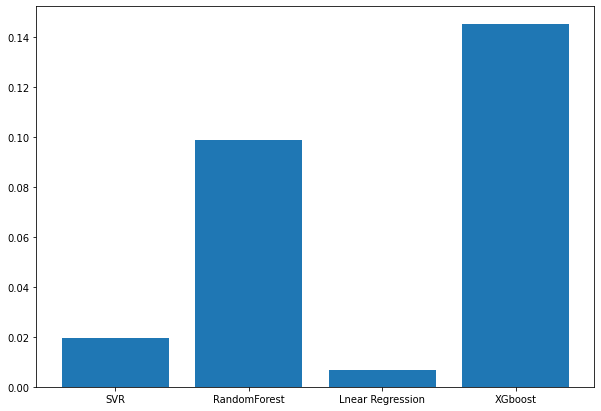

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(MseDictionary)), list(MseDictionary.values()), align='center')
plt.xticks(range(len(MseDictionary)), list(MseDictionary.keys()))
plt.show()

In [ ]:
temp = min(MseDictionary.values())
res = [key for key in MseDictionary if MseDictionary[key] == temp]
  
print("Best Model is: " + str(res))

Best Model is: ['Lnear Regression']


# Market Cap Column

In [ ]:
X=np.array(Data['Market Cap'])
Y=np.array(Data['PredictedMarketCap'])
print(len(X))
print(Y)

1311
[ 3.98663196  3.91473493  4.06586245 ... -0.05542291 -0.08119483
 -0.09951737]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state=2021)
print(len(Y_train))
len(X_train)

1048


1048

In [ ]:
Y_train

array([-0.39449912,  1.11108539,  0.16709565, ..., -0.16977272,
        3.56004221, -0.23748142])

##Models

In [ ]:
MseDictionary={'SVR':0}

###SVR

In [ ]:
SVRModel=SVR(kernel='rbf',C=100,gamma=0.001)
SVRModel.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
acc=SVRModel.score(X_test.reshape(-1, 1),Y_test.reshape(-1, 1))
print("Accuracy from Svr ",acc)


Accuracy from Svr  0.9902668675257733


In [ ]:
acc=SVRModel.score(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
print("Accuracy from Svr ",acc)

Accuracy from Svr  0.9925725908248119


In [ ]:
Y_pred=SVRModel.predict(Y_test.reshape(-1, 1))
print("Predicted Values of Open")
print(Y_pred[0:5])
print( )
print("Actual Values of Open")
print(Y_test[0:5])

Predicted Values of Open
[-0.55732963 -0.29241769 -0.33952169 -0.0102868  -0.50050688]

Actual Values of Open
[-0.54782111 -0.28869537 -0.33477589 -0.01259787 -0.49224386]


In [ ]:
ms=mse(Y_test.reshape(-1, 1), Y_pred)
MseDictionary['SVR']=ms

In [ ]:
ToBePredictedDays.reshape(-1, 1)

array([[3.96033495],
       [3.88769614]])

In [ ]:
Predictions=SVRModel.predict(ToBePredictedDays.reshape(-1, 1))
print(Predictions)
 

[3.95662915 3.88684131]


###Random Forest Regressor

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=regr.predict(Y_test.reshape(-1, 1))
mse(Y_test.reshape(-1, 1), Y_pred)

0.05639908499957836

In [ ]:
MseDictionary['RandomForest']=mse(Y_test.reshape(-1, 1), Y_pred)

In [ ]:
MseDictionary

{'RandomForest': 0.05639908499957836, 'SVR': 0.00012009066369809174}

###Linear Regression

In [ ]:
reg = LinearRegression().fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=reg.predict(Y_test.reshape(-1, 1))
print(mse(Y_test.reshape(-1, 1), Y_pred))
MseDictionary['Lnear Regression']=mse(Y_test.reshape(-1, 1), Y_pred)

6.574842342972388e-05


In [ ]:
MseDictionary


{'Lnear Regression': 6.574842342972388e-05,
 'RandomForest': 0.05639908499957836,
 'SVR': 0.00012009066369809174}

###Xgboost

In [ ]:
model=XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
Y_pred=model.predict(Y_test.reshape(-1, 1))
print(mse(Y_test.reshape(-1, 1), Y_pred))
MseDictionary['XGboost']=mse(Y_test.reshape(-1, 1), Y_pred)

[14:03:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.011889862540848778


##Comparison 

In [ ]:
MseDictionary

{'Lnear Regression': 6.574842342972388e-05,
 'RandomForest': 0.05639908499957836,
 'SVR': 0.00012009066369809174,
 'XGboost': 0.011889862540848778}

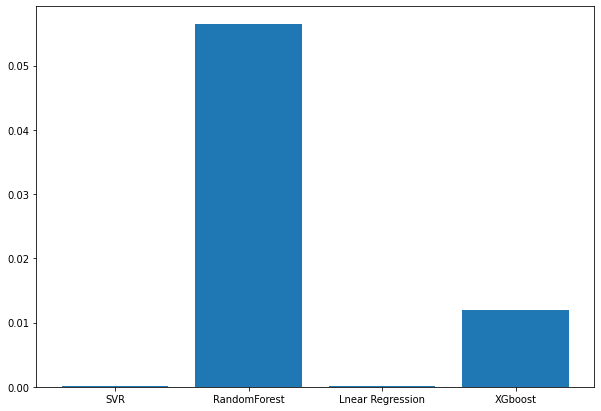

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(MseDictionary)), list(MseDictionary.values()), align='center')
plt.xticks(range(len(MseDictionary)), list(MseDictionary.keys()))
plt.show()


In [ ]:
temp = min(MseDictionary.values())
res = [key for key in MseDictionary if MseDictionary[key] == temp]
  
print("Best Model is: " + str(res))

Best Model is: ['Lnear Regression']


#Comparing different models on different no of prediction days

In [41]:
def Predict(predictiondays,Data):
  Predictiondays=predictiondays
  Data['PredictedOpen']=Data[['Open']].shift(Predictiondays)
  print("Original No Of Rows in Dataset: ",len(Data))
  Data =Data.dropna(axis=0)
  print("No Of Rows in Dataset after droping NAN values: ",len(Data))
  X=np.array(Data['Open'])
  Y=np.array(Data['PredictedOpen'])
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state=2021)

  MseDictionary={}
  ##svm
  SVRModel=SVR(kernel='rbf',C=100,gamma=0.001)
  SVRModel.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
  Y_pred=SVRModel.predict(Y_test.reshape(-1, 1))
  ms=mse(Y_test.reshape(-1, 1), Y_pred)
  MseDictionary['SVR']=ms

  ##random
  regr = RandomForestRegressor(max_depth=2, random_state=0)
  regr.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
  Y_pred=regr.predict(Y_test.reshape(-1, 1))
  mse(Y_test.reshape(-1, 1), Y_pred)
  MseDictionary['RandomForest']=mse(Y_test.reshape(-1, 1), Y_pred)

  ##linear
  reg = LinearRegression().fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
  Y_pred=reg.predict(Y_test.reshape(-1, 1))
  print(mse(Y_test.reshape(-1, 1), Y_pred))
  MseDictionary['Lnear Regression']=mse(Y_test.reshape(-1, 1), Y_pred)
  ### XGBOOST
  model=XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
  model.fit(X_train.reshape(-1, 1),Y_train.reshape(-1, 1))
  Y_pred=model.predict(Y_test.reshape(-1, 1))
  print(mse(Y_test.reshape(-1, 1), Y_pred))
  MseDictionary['XGboost']=mse(Y_test.reshape(-1, 1), Y_pred)

  return MseDictionary



In [55]:
data1=Data.copy(deep=True)
x1=Predict(2,data1)
x1

Original No Of Rows in Dataset:  1313
No Of Rows in Dataset after droping NAN values:  1311
5.156210925447156e-05
[17:07:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.01163919651105041


{'Lnear Regression': 5.156210925447156e-05,
 'RandomForest': 0.05538748479179345,
 'SVR': 5.987385816707458e-05,
 'XGboost': 0.01163919651105041}

In [56]:
data1=Data.copy(deep=True)
x2=Predict(30,data1)
x2

Original No Of Rows in Dataset:  1313
No Of Rows in Dataset after droping NAN values:  1283
0.029054635716459033
[17:07:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.15110545430547143


{'Lnear Regression': 0.029054635716459033,
 'RandomForest': 0.16543155528396364,
 'SVR': 0.0075881585134177625,
 'XGboost': 0.15110545430547143}

In [57]:
data1=Data.copy(deep=True)
x3=Predict(60,data1)
x3

Original No Of Rows in Dataset:  1313
No Of Rows in Dataset after droping NAN values:  1253
0.33481372953277866
[17:07:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.36423408225151294


{'Lnear Regression': 0.33481372953277866,
 'RandomForest': 0.25407340788400506,
 'SVR': 0.146861036736609,
 'XGboost': 0.36423408225151294}

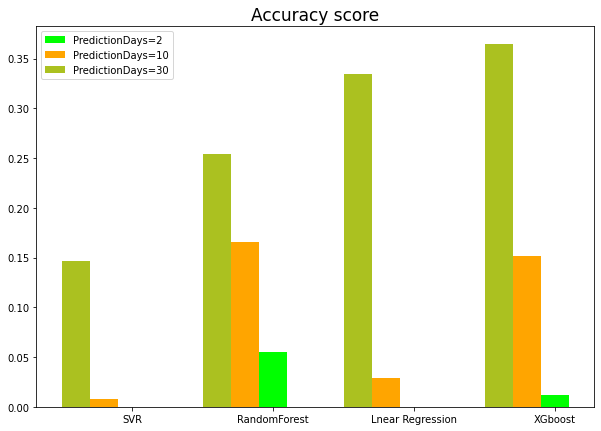

In [58]:
plt.figure(figsize=(10, 7))
X = np.arange(len(x1))
ax = plt.subplot(111)
ax.bar(X, x1.values(), width=0.2, color='#00FF00', align='center')
ax.bar(X-0.2, x2.values(), width=0.2, color='#FFA500', align='center')
ax.bar(X-0.4, x3.values(), width=0.2, color='#ABC120', align='center')
ax.legend(('PredictionDays=2','PredictionDays=10','PredictionDays=30'))
plt.xticks(X, x1.keys())
plt.title("Accuracy score", fontsize=17)
plt.show()
